In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow numpy streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential,load_model

In [ ]:
import os
import zipfile

# Path to the main directory containing ZIP files
main_dir = '/content/drive/MyDrive/flowers'

# Directory to extract ZIP files
extract_dir = '/content/flowers_extracted'

# Function to count images recursively in a folder
def count_images(folder):
    image_count = 0
    for root, _, files in os.walk(folder):  # Traverse all subdirectories
        image_count += len([f for f in files if f.endswith(('.jpg', '.jpeg', '.png'))])
    return image_count

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Process all ZIP files
for file in os.listdir(main_dir):
    if file.endswith('.zip'):  # Check for ZIP files
        file_path = os.path.join(main_dir, file)
        print(f"Extracting {file}...")

        # Extract the ZIP file
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(os.path.join(extract_dir, file.replace('.zip', '')))

        # Count images in the extracted folder
        extracted_folder = os.path.join(extract_dir, file.replace('.zip', ''))
        image_count = count_images(extracted_folder)
        print(f"{file} contains {image_count} images.")



Extracting dandelion.zip...
dandelion.zip contains 1052 images.
Extracting daisy.zip...
daisy.zip contains 764 images.
Extracting rose.zip...
rose.zip contains 784 images.
Extracting sunflower.zip...
sunflower.zip contains 733 images.
Extracting tulip.zip...
tulip.zip contains 984 images.


In [ ]:
import os
import shutil

# Paths to the original extracted folder and the new final folder
extracted_dir = '/content/flowers_extracted'
final_dir = '/content/flowers_final'

# Create the final directory if it doesn't exist
os.makedirs(final_dir, exist_ok=True)

# Traverse the current folder structure
for root, dirs, files in os.walk(extracted_dir):
    for file in files:
        # Check if the file is an image
        if file.endswith(('.jpg', '.jpeg', '.png')):
            # Find the parent category folder (e.g., 'daisy', 'dandelion')
            category = root.split('/')[-2]  # Extract the parent folder name
            category_dir = os.path.join(final_dir, category)  # Path to the category folder in 'flowers_final'

            # Create the category folder if it doesn't exist
            os.makedirs(category_dir, exist_ok=True)

            # Move the image to the new structure
            source_file = os.path.join(root, file)  # Full path to the source file
            dest_file = os.path.join(category_dir, file)  # Full path to the destination
            shutil.move(source_file, dest_file)
            print(f"Moved: {source_file} -> {dest_file}")


Moved: /content/flowers_extracted/tulip/tulip/17719248689_cfd5d2f228_n.jpg -> /content/flowers_final/tulip/17719248689_cfd5d2f228_n.jpg
Moved: /content/flowers_extracted/tulip/tulip/14487762578_baba13d16a_m.jpg -> /content/flowers_final/tulip/14487762578_baba13d16a_m.jpg
Moved: /content/flowers_extracted/tulip/tulip/2399982682_16929d1f6d_n.jpg -> /content/flowers_final/tulip/2399982682_16929d1f6d_n.jpg
Moved: /content/flowers_extracted/tulip/tulip/11746452_5bc1749a36.jpg -> /content/flowers_final/tulip/11746452_5bc1749a36.jpg
Moved: /content/flowers_extracted/tulip/tulip/3502685880_f026400dce_n.jpg -> /content/flowers_final/tulip/3502685880_f026400dce_n.jpg
Moved: /content/flowers_extracted/tulip/tulip/13472141763_f2517e7f0d.jpg -> /content/flowers_final/tulip/13472141763_f2517e7f0d.jpg
Moved: /content/flowers_extracted/tulip/tulip/13531001134_72052100e1_m.jpg -> /content/flowers_final/tulip/13531001134_72052100e1_m.jpg
Moved: /content/flowers_extracted/tulip/tulip/25429501953_a1f9ce09

In [ ]:
count = 0
dirs = os.listdir('/content/flowers_final')
for dir in dirs:
  folder_path = os.path.join('/content/flowers_final', dir)
  files = list(os.listdir(folder_path))
  print(dir + ' Folder has ' + str(len(files)) + '  Images')
  count += len(files)
print('Total ' + str(count) + ' Images')

tulip Folder has 984  Images
rose Folder has 784  Images
daisy Folder has 764  Images
sunflower Folder has 733  Images
dandelion Folder has 1052  Images
Total 4317 Images


In [ ]:
base_dir = '/content/flowers_final'
img_size = 180
batch_size = 32

In [ ]:
#loading images into arrays as arrays

train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 123,
                                                       validation_split = 0.2,
                                                       subset = 'training',
                                                       batch_size = batch_size,
                                                       image_size=(img_size,img_size))


val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 123,
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       batch_size = batch_size,
                                                       image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [ ]:
flower_name = train_ds.class_names
print(flower_name)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [ ]:
import matplotlib.pyplot as plt

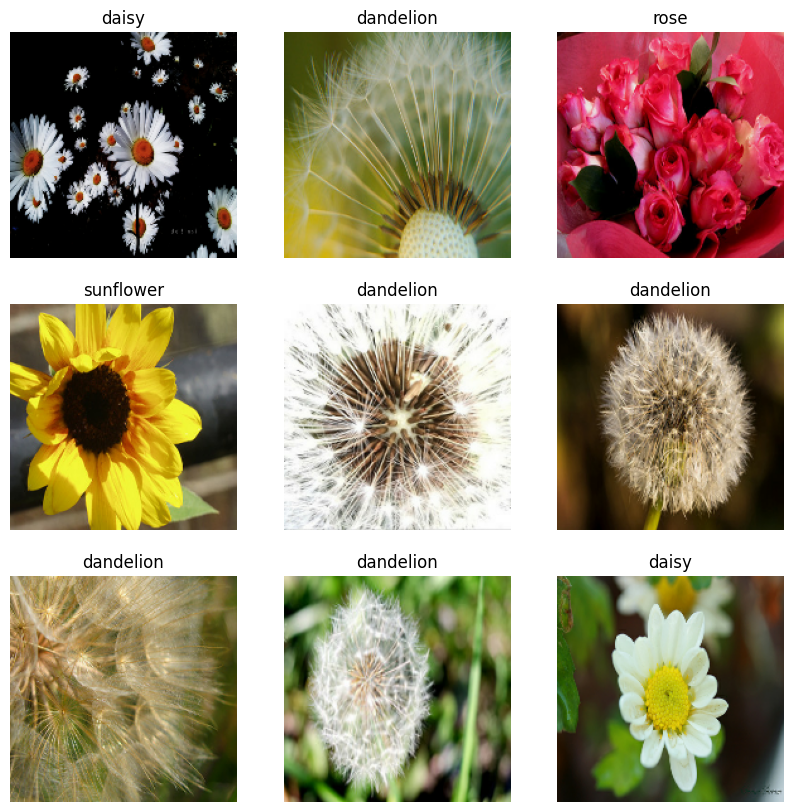

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
      plt.subplot(3,3,i+1)
      plt.imshow(images[i].numpy().astype('uint8'))
      plt.title(flower_name[labels[i]])
      plt.axis('off')

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
#data augmentation to reduce overfitting it applies random shuffle zoom and makes them more images as we have small dataset
from tensorflow.keras.layers import Input  # Import Input

data_augmentation = Sequential([
    Input(shape=(img_size, img_size,3)),  # Define the input shape here
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


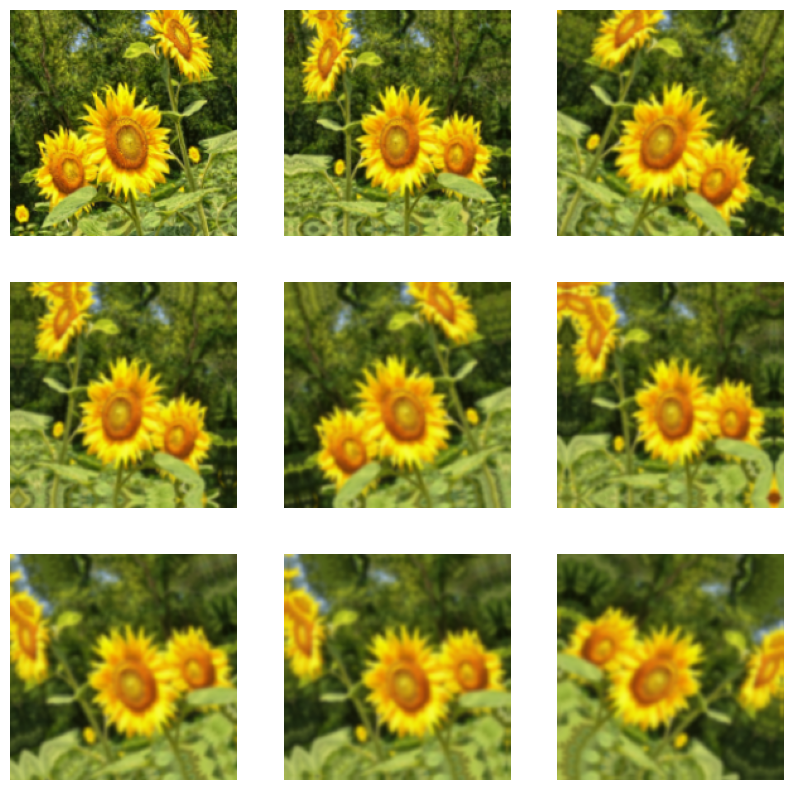

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
      images = data_augmentation(images)
      plt.subplot(3,3,i+1)
      plt.imshow(images[0].numpy().astype('uint8'))
      plt.axis('off')

In [ ]:
#Model Creation

In [ ]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_ds,validation_data=val_ds,epochs=15)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.3462 - loss: 1.4722 - val_accuracy: 0.5261 - val_loss: 1.1185
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.5627 - loss: 1.0893 - val_accuracy: 0.6072 - val_loss: 0.9898
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.6395 - loss: 0.9497 - val_accuracy: 0.6292 - val_loss: 0.9437
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.6532 - loss: 0.8954 - val_accuracy: 0.6454 - val_loss: 0.9246
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.6799 - loss: 0.8243 - val_accuracy: 0.6698 - val_loss: 0.8211
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.6801 - loss: 0.7976 - val_accuracy: 0.6698 - val_loss: 0.8500
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.6946 - loss: 0.7932 - val_accuracy: 0.6871 - val_loss: 0.8443
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.7214 - loss: 0.7489 - val_accu